Call libraries

In [53]:
# 1.0 Clear ipython memory
#%reset -f

# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [45]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

In [4]:
# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

In [5]:
# 1.14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [170]:
# 1.16 If you are using colab
#      Execute following code
#      to mount you

from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Read Data

In [7]:

path = "/gdrive/MyDrive/colab_data_ files/Excercise RFC/"

In [8]:
os.chdir(path)
os.listdir()

['Walmart Sales Dataset of 45stores.zip']

In [9]:
#  Our data file
tr_f = "Walmart Sales Dataset of 45stores.zip"

#  Total number of rows: 250001
#     But we will read 40% of data randomly
total_lines = 250000
num_lines = 0.4 * total_lines    # 40% of data


#  Read randomly 'p' fraction of files
#     Ref: https://stackoverflow.com/a/48589768

p = num_lines/total_lines  # fraction of lines to read (40%)

In [10]:
#  How to pick up random rows from hard-disk
#       without first loading the complete file in RAM
#       Toss a coin:
#           At each row, toss a biased-coin: 60%->Head, 40%->tail
#           If tail comes, select the row else not.
#           Toss a coin: random.random()
#           Head occurs if value > 0.6 else it is tail
#
#       We do not toss the coin for header row. Keep the header

data = pd.read_csv(
         tr_f,
         header=0,   # First row is header-row
         # 'and' operator returns True if both values are True
         #  random.random() returns values between (0,1)
         #  No of rows skipped will be around 60% of total
         skiprows=lambda i: (i >0 ) and (random.random() > p)    # (i>0) implies skip first header row
         )



## Explore data and process data

In [12]:
# 3.0 Explore data
print("\n Shape")
data.shape                
print("\n\n Columns")
data.columns.values      
print("\n")                 
                        
print("\n\nData types")                        
data.dtypes.value_counts()  
print("\n\n--normalized--\n")
data.value_counts(normalize=True)
print("\n")
data.head(3)


 Shape


(2525, 8)



 Columns


array(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'], dtype=object)





Data types


float64    5
int64      2
object     1
dtype: int64



--normalized--



Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      01-06-2012  1624477.58    0             77.95        3.501       221.747214  7.143           0.000396
30     15-06-2012  438523.24     0             81.51        3.393       221.400990  6.891           0.000396
       12-03-2010  468189.93     0             57.10        2.667       211.037551  8.324           0.000396
       12-08-2011  412224.67     0             92.32        3.638       215.259321  7.852           0.000396
       13-01-2012  447023.91     0             45.00        3.261       219.532820  7.057           0.000396
                                                                                                      ...   
15     13-08-2010  622437.08     0             72.17        2.923       132.630000  8.099           0.000396
       14-01-2011  479424.20     0             19.53        3.367       132.951065  7.771           0.000396
       14-05-2010  594385.20   

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
1,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
2,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106


In [13]:
#  Examine data statistics
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,2525.000000,2.525000e+03,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000
mean,22.550099,1.037680e+06,0.064950,60.782820,3.359203,172.336691,7.973640
std,12.983699,5.639070e+05,0.246487,18.330879,0.458462,39.504865,1.830818
min,1.000000,2.198049e+05,0.000000,5.540000,2.514000,126.064000,3.879000
25%,11.000000,5.452511e+05,0.000000,47.550000,2.934000,131.901968,6.891000
50%,22.000000,9.445872e+05,0.000000,62.370000,3.452000,185.791961,7.872000
75%,34.000000,1.416301e+06,0.000000,75.090000,3.734000,213.031119,8.595000
max,45.000000,3.749058e+06,1.000000,99.220000,4.468000,227.232807,14.313000


In [107]:
#  Check if there are Missing/null values? None

data.isnull().sum()            # None
print("\n----------")
data.isnull().sum().sum()      # None
print("\n------------")
data.duplicated().sum()        # None

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
               ..
Store_42        0
Store_43        0
Store_44        0
Store_45        0
Week            0
Length: 102, dtype: int64


----------


0


------------


0

FEATURE ENGINEERING

In [108]:
# ENCODING STORE COLUMN
pd.get_dummies(data['Store'],prefix='store')

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
def onehot_encode(df , column ,prefix):
    df=df.copy()
    dummies = pd.get_dummies(df[column],prefix=prefix)
    df = pd.concat([df, dummies],axis=1)
    
    return df

In [110]:
#But the 'Date' column will be changed to datetime type

data['Date'] = pd.to_datetime(data['Date'], format=('%d-%m-%Y'))


In [111]:
data = onehot_encode(data,column='Store', prefix='Store')

In [112]:
#here we have add the date column to feature importance
data['day'] = data.Date.dt.day
data['month'] = data.Date.dt.month 
data['Year'] = data.Date.dt.year



splitting and scaling


In [113]:
#Creating a clustering

y=data[['Holiday_Flag']]
x=data[['Weekly_Sales','Fuel_Price','CPI','Store']]

In [114]:

# Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=0
                                                    )

# 
X_train.shape        
X_test.shape         
y_train.shape        
y_test.shape         

(1262, 4)

(1263, 4)

(1262, 1)

(1263, 1)

Fitting Decision Tree

In [115]:
from  sklearn.tree import DecisionTreeRegressor

dt_reg=DecisionTreeRegressor()
dt_reg=dt_reg.fit(X_train,y_train)

#prediction for DT
y_pred_dt=dt_reg.predict(X_test)

In [116]:
# mean Square Error

mse_dt=np.round(mean_squared_error(y_test,y_pred_dt),2)
mse_dt

0.08

In [117]:
#r2 score

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
r2_score_dt=np.round(r2_score(y_test,y_pred_dt),3)
r2_score_dt

-0.26

In [118]:
#mean absolure error

MAE_dt=np.round(mean_absolute_error(y_test,y_pred_dt),4)
MAE_dt

0.08

In [172]:
#Feature Importance
#x train
feature_imp = pd.Series(dt_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)
feature_imp*100

CPI             39.003416
Fuel_Price      33.370174
Weekly_Sales    20.392085
Store            7.234325
dtype: float64

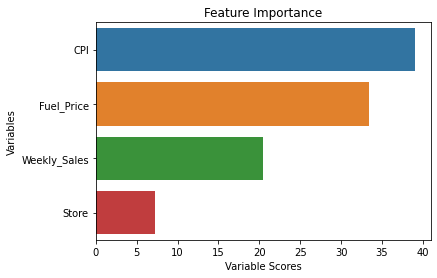

In [173]:
import seaborn as sn
#Displaying the feature_importances data
sn.barplot(x= feature_imp*100, y = feature_imp.index);
plt.xlabel("Variable Scores");
plt.ylabel("Variables");
plt.title("Feature Importance");
plt.show();

Fitting a Gradiant Boost Regressor

In [174]:
#creating parameters

parameters = {
    "n_estimators": 200,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error"
}

In [175]:
#GradientBoostingRegressor

gb_reg=GradientBoostingRegressor(**parameters)
gb_reg=gb_reg.fit(X_train,np.ravel(y_train))

gb_reg

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=5,
                          n_estimators=200)

In [176]:
#generatind prediction for GBR

y_pred_gb=gb_reg.predict(X_test)
y_pred_gb
print("\n")
pred_gb=gb_reg.predict(X_train)
pred_gb

array([0.03526132, 0.02295541, 0.03790403, ..., 0.02442383, 0.07934571,
       0.04007519])

array([0.47648226, 0.06193839, 0.07767375, ..., 0.05168237, 0.07669403,
       0.02593711])

In [177]:
# mean Square Error

mse_gbr=np.round(mean_squared_error(y_test,y_pred_gb),2)
mse_gbr


0.05

In [178]:
#r2 score


r2_score_gb=np.round(r2_score(y_test,y_pred_gb),3)
r2_score_gb

0.153

In [179]:
#mean absolure error

MAE_gb=np.round(mean_absolute_error(y_test,y_pred_gb),4)
MAE_gb

0.1069

In [180]:
#Feature Importance
#x train
feature_imp1 = pd.Series(gb_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)
feature_imp1*100

Fuel_Price      51.485383
CPI             33.448906
Weekly_Sales    11.089523
Store            3.976189
dtype: float64

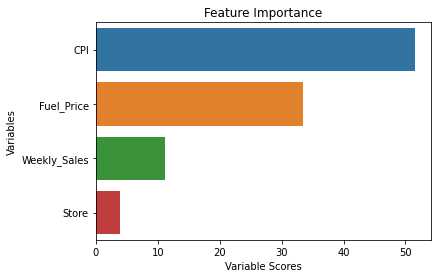

In [181]:
import seaborn as sn
#Displaying the feature_importances data
sn.barplot(x= feature_imp1*100, y = feature_imp.index);
plt.xlabel("Variable Scores");
plt.ylabel("Variables");
plt.title("Feature Importance");
plt.show();

grid search cv

In [193]:
#parameters
parameters2={'learning_rate':[0.01, 0.1],
        'max_depth':[2,5],
        'min_child_weight':[1,3,5],
        'subsample':[.5, .7],
        'n_estimators':[100,150]}

In [194]:
xgb_rg=XGBRegressor()

gs_reg=GridSearchCV(estimator=xgb_rg,
                    param_grid=parameters2,
                    cv=2,verbose=2,n_jobs=-1)

#fitting
gs_reg.fit(X_train,np.ravel(y_train))

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[07:54:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [2, 5],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 150], 'subsample': [0.5, 0.7]},
             verbose=2)

In [198]:
#performance of each model
print("\ngood model score")
gs_reg.best_score_

print("\n\n---- accuracy parameters")
gs_reg.best_params_



good model score


0.07400402333984768



---- accuracy parameters


{'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.7}

In [199]:
#predicting score

gs_pred=gs_reg.predict(X_test)
gs_pred

array([0.0076879 , 0.00140622, 0.02581546, ..., 0.04053307, 0.15893027,
       0.03353137], dtype=float32)

In [202]:
# mean Square Error

mse_gs=np.round(mean_squared_error(y_test,gs_pred),2)
print("\n\ngs mse")
mse_gs

#r2 score

r2_score_gs=np.round(r2_score(y_test,gs_pred),3)
print("------\n\ngs r2")
r2_score_gs

#mean absolure error

MAE_gs=np.round(mean_absolute_error(y_test,gs_pred),4)
print("----\n\ngs MAE")
MAE_gs




gs mse


0.06

------

gs r2


0.129

----

gs MAE


0.1078

In [209]:
#feature importance

importances=gs_reg.best_estimator_.feature_importances_
f_imp=pd.DataFrame(importances, )
f_imp

,0
0,0.184662
1,0.358298
2,0.329343
3,0.127697


XGBoost Regressor



In [221]:
xgb_rg=XGBRegressor()

xgb_rg.fit(X_train,y_train)
xgb_rg.fit

[08:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

<bound method XGBModel.fit of XGBRegressor()>

In [222]:
xgb_pred=xgb_rg.predict(X_test)
xgb_pred

array([0.02036834, 0.01520896, 0.02730107, ..., 0.0095149 , 0.11249408,
       0.02221483], dtype=float32)

In [223]:
X_test.iloc[0]

Weekly_Sales    529384.310000
Fuel_Price           2.770000
CPI                214.139914
Store                9.000000
Name: 478, dtype: float64

In [224]:
y_test.iloc[0]

Holiday_Flag    0
Name: 478, dtype: int64

In [225]:
#training prediction

pred_xgb=xgb_rg.predict(X_train)

In [226]:
# mean Square Error

mse_xgbr=np.round(mean_squared_error(y_test,xgb_pred),2)
mse_xgbr


0.05

In [227]:
#r2 score

r2_score_xgb=np.round(r2_score(y_test,xgb_pred),3)
r2_score_xgb

0.162

In [228]:
#mean absolure error

MAE_xgb=np.round(mean_absolute_error(y_test,xgb_pred),4)
MAE_xgb

0.1033

for training

In [230]:
# mean Square Error

mse_xgbr=np.round(mean_squared_error(y_train,pred_xgb),2)
print("\nxgbr mse")
mse_xgbr

#r2 score

r2_score_xgb=np.round(r2_score(y_train,pred_xgb),3)
print("\n \n xgbr r2")
r2_score_xgb

#mean absolure error

MAE_xgb=np.round(mean_absolute_error(y_train,pred_xgb),4)
print("\n \n xgbr MAE")
MAE_xgb



xgbr mse


0.03


 
 xgbr r2


0.483


 
 xgbr MAE


0.0789

RandomizedSearchCV

In [232]:
#hyperparameter initialization 
params= {'learning_rate':  uniform(0, 1),
              'n_estimators':   range(50,300),
              'max_depth':      range(3,10)
              }

In [240]:
#initiating randomize object

rs=RandomizedSearchCV(estimator=xgb_rg, 
                           param_distributions=params,
                        cv=2, verbose=1, n_jobs=-1 )
print("\n\ntraing model:")
#Train the model
rs.fit(X_train,y_train)

print("\n\npredictin:")
#predicting the model 
y_pred=rs.predict(X_test)
y_pred[:4]



traing model:
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[08:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f019ebe7cd0>,
                                        'max_depth': range(3, 10),
                                        'n_estimators': range(50, 300)},
                   verbose=1)



predictin:


array([ 0.01120073, -0.0091204 ,  0.01689088, -0.01245946], dtype=float32)

In [242]:
# mean Square Error

mse_rs=np.round(mean_squared_error(y_test,y_pred),2)
print("\n rs mse")
mse_rs

#r2 score

r2_score_rs=np.round(r2_score(y_test,y_pred),3)
print("------\n rs r2")
r2_score_rs

#mean absolure error

MAE_rs=np.round(mean_absolute_error(y_test,y_pred),4)
print("----\n rs MAE")
MAE_rs



 rs mse


0.05

------
 rs r2


0.235

----
 rs MAE


0.0917

BayesSearchCV

In [243]:
#parameters

baseparams={'max_depth':Integer(2,7),
         'learning_rate':Real(0.01, 0.1,prior='log-uniform'),
          'alpha':Real(1e-5,100,prior='log-uniform'),
          'gamma':Real(1e-9, 0.5,prior='log-uniform'),
         'n_estimators':Integer(50,100)}

In [245]:
#object creating

bsearch=BayesSearchCV(estimator=xgb_rg,
                      search_spaces=baseparams,
                       cv=2,
                       verbose=1
                      )

#training the model

bsearch.fit(X_train,y_train);

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[08:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[08:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[08:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[0

In [247]:
#Checking the model score

print("BayesSearch result \n")
print("Best score \n",bsearch.best_score_)
print("Best params \n", bsearch.best_params_)

BayesSearch result 

Best score 
 0.07456467885662293
Best params 
 OrderedDict([('alpha', 5.717209679767812), ('gamma', 2.660984168220913e-09), ('learning_rate', 0.07442826183471551), ('max_depth', 4), ('n_estimators', 80)])


In [248]:
#predicting the model
bpred=bsearch.predict(X_test)
bpred

array([0.02314368, 0.01908597, 0.03827631, ..., 0.00663108, 0.08825961,
       0.02646703], dtype=float32)

In [250]:
# mean Square Error

mse_bayes=np.round(mean_squared_error(y_test,bpred),2)
print("\n bayes mse")
mse_bayes

#r2 score

r2_score_bayes=np.round(r2_score(y_test,bpred),3)
print("------\n\n bayes r2")
r2_score_bayes

#mean absolure error

MAE_bayes=np.round(mean_absolute_error(y_test,bpred),4)
print("----\n\n bayes MAE")
MAE_bayes



 bayes mse


0.05

------

 bayes r2


0.166

----

 bayes MAE


0.1025